# Analysis of products for users who churn in the first orders

This notebook uses as a input the featured engineered data.

In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

# Setting pandas dataframe parameters
pd.set_option('display.max_columns', None)

In [83]:
df_all_orders_infos= pd.read_csv("users_with_order_items_sub_info_1st_to_4th_order_all_order_sums_2020-10-01_00_00_00_6W.csv").drop(columns="Unnamed: 0")

data_order_cutoff_str="2019-10-01_00_00_00" #%Y-%M-%D
data_order_cutoff=datetime.strptime(data_order_cutoff_str, '%Y-%m-%d_%H_%M_%S')

churn_predict_dat_str="2020-07-01_00_00_00" #%Y-%M-%D
churn_predict_date=datetime.strptime(churn_predict_dat_str, '%Y-%m-%d_%H_%M_%S')

n_orders_min = 1
churn_days = 42

#########################################

df_all_orders_infos["first_paid_date"] = pd.to_datetime(df_all_orders_infos["first_paid_date"])

df_user_2nd_order_churn = df_all_orders_infos.copy()

df_user_2nd_order_churn=df_all_orders_infos[(df_all_orders_infos["first_paid_date"]>=data_order_cutoff) &(df_all_orders_infos["n_orders"]>=n_orders_min)]

df_user_2nd_order_churn['churn_2nd_order']=np.where(df_user_2nd_order_churn["first_paid_date"]>=churn_predict_date,-1,
                                                   np.where(((df_user_2nd_order_churn["n_orders"]>n_orders_min) & (df_user_2nd_order_churn["delta_1st_2nd_order"]<=churn_days)),0,1))

df_user_2nd_order_churn = df_user_2nd_order_churn[df_user_2nd_order_churn['churn_2nd_order']!=-1]

C:\Users\Gianluca\Anaconda3\envs\propulsion\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (342) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Gianluca\Anaconda3\envs\propulsion\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [84]:
df_user_2nd_order_churn.groupby('churn_2nd_order')['user_id'].count()

churn_2nd_order
0    1402
1    2745
Name: user_id, dtype: int64

In [85]:
n_orders_min = 2
churn_days = 42

#########################################

df_user_3rd_order_churn = df_all_orders_infos.copy()

df_user_3rd_order_churn["second_paid_date"] = df_user_3rd_order_churn["first_paid_date"] + pd.to_timedelta(df_user_3rd_order_churn['delta_1st_2nd_order'],'d')
df_user_3rd_order_churn["delta_2nd_3rd_order"] = df_user_3rd_order_churn["delta_1st_3rd_order"] - df_user_3rd_order_churn["delta_1st_2nd_order"]

df_user_3rd_order_churn=df_user_3rd_order_churn[(df_user_3rd_order_churn["first_paid_date"]>=data_order_cutoff) &(df_user_3rd_order_churn["n_orders"]>=n_orders_min)]

df_user_3rd_order_churn['churn_3rd_order']=np.where(df_user_3rd_order_churn["second_paid_date"]>=churn_predict_date,-1,
                                                   np.where(((df_user_3rd_order_churn["n_orders"]>n_orders_min) & (df_user_3rd_order_churn["delta_2nd_3rd_order"]<=churn_days)),0,1))

df_user_3rd_order_churn = df_user_3rd_order_churn[df_user_3rd_order_churn['churn_3rd_order']!=-1]

In [86]:
df_user_3rd_order_churn.groupby('churn_3rd_order')['user_id'].count()

churn_3rd_order
0    829
1    668
Name: user_id, dtype: int64

# Churn 2nd Order - Product Plots

In [87]:
cols = [col for col in df_user_2nd_order_churn.columns if ('num_' in col) & ('1st_' in col) & ('items_' not in col) & ('prod_types_' not in col) & ('cups' not in col) & ('pouches' not in col) & ('yoghurts' not in col)]
cols.extend(['user_id'])
cols.extend(['churn_2nd_order'])
#cols.remove('num_prod_types_in_1st_order')

df_plot_2nd_order = df_user_2nd_order_churn[cols]
df_plot_2nd_order=df_plot_2nd_order.set_index(['user_id', 'churn_2nd_order']).stack().reset_index()
df_plot_2nd_order.columns=['user_id', 'churn_2nd_order', 'product','count']

df_plot_2nd_order_agg = df_plot_2nd_order.groupby(['churn_2nd_order','product'])['count'].sum().reset_index()

df_plot_2nd_order_agg['proportion'] = ''

df_plot_2nd_order_agg.loc[df_plot_2nd_order_agg['churn_2nd_order']==0, 'proportion'] = df_plot_2nd_order_agg[df_plot_2nd_order_agg['churn_2nd_order']==0]['count'] / df_plot_2nd_order_agg[df_plot_2nd_order_agg['churn_2nd_order']==0]['count'].sum()
df_plot_2nd_order_agg.loc[df_plot_2nd_order_agg['churn_2nd_order']==1, 'proportion'] = df_plot_2nd_order_agg[df_plot_2nd_order_agg['churn_2nd_order']==1]['count'] / df_plot_2nd_order_agg[df_plot_2nd_order_agg['churn_2nd_order']==1]['count'].sum()

In [88]:
df_plot_2nd_order_agg.head(3)

,churn_2nd_order,product,count,proportion
0,0,num_1_in_1st_order,99.0,0.00420346
1,0,num_2201_in_1st_order,1872.0,0.0794837
2,0,num_2202_in_1st_order,838.0,0.0355808


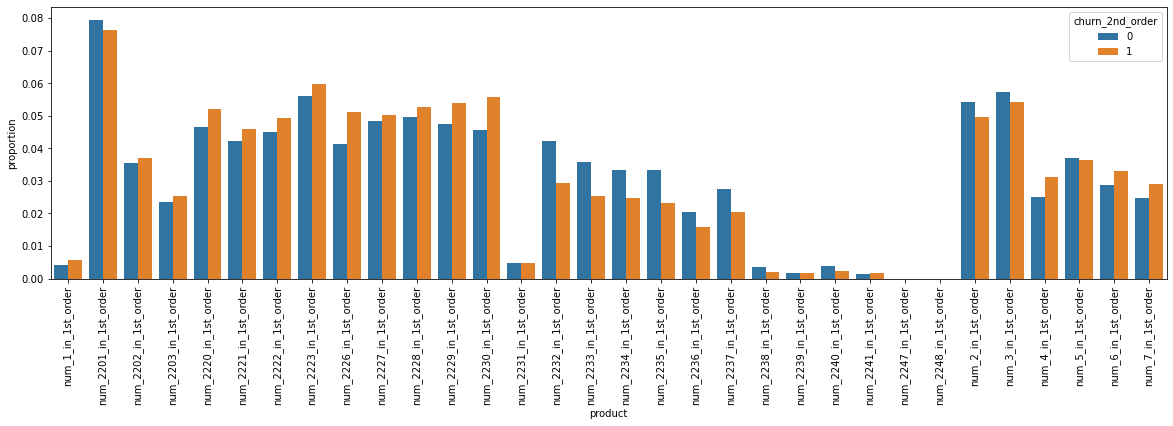

In [89]:
fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data=df_plot_2nd_order_agg, x='product', y='proportion', hue='churn_2nd_order', ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(90)

## Show the most common product combinations in churn and non-churn scenarios 

In [90]:
df_plot_2nd_order['user_prod_mix'] = df_plot_2nd_order[df_plot_2nd_order['count']>0].groupby(['user_id','churn_2nd_order'])['product'].transform(lambda x: ', '.join(x))

df_plot_2nd_order_prod_mix = df_plot_2nd_order.groupby(['user_id', 'churn_2nd_order'])['user_prod_mix'].unique().reset_index()
df_plot_2nd_order_prod_mix['user_prod_mix'] = df_plot_2nd_order_prod_mix['user_prod_mix'].astype(str)

TMP = pd.DataFrame(df_plot_2nd_order_prod_mix['user_prod_mix'].unique())
TMP = TMP.reset_index()
TMP.columns = ['user_prod_mix_num', 'user_prod_mix']
TMP['user_prod_mix_num'] = TMP['user_prod_mix_num'].astype(str)

df_plot_2nd_order_prod_mix = pd.merge(left=df_plot_2nd_order_prod_mix, right=TMP, how='left', on='user_prod_mix')

df_plot_2nd_order_prod_mix = df_plot_2nd_order_prod_mix.groupby(['user_prod_mix', 'user_prod_mix_num', 'churn_2nd_order'])['user_id'].count().reset_index()
df_plot_2nd_order_prod_mix.columns=['user_prod_mix', 'user_prod_mix_num', 'churn_2nd_order', 'user_count']

df_plot_2nd_order_prod_mix['proportion'] = ''
df_plot_2nd_order_prod_mix.loc[df_plot_2nd_order_prod_mix['churn_2nd_order']==0, 'proportion'] = df_plot_2nd_order_prod_mix[df_plot_2nd_order_prod_mix['churn_2nd_order']==0]['user_count'] / df_plot_2nd_order_prod_mix[df_plot_2nd_order_prod_mix['churn_2nd_order']==0]['user_count'].sum()
df_plot_2nd_order_prod_mix.loc[df_plot_2nd_order_prod_mix['churn_2nd_order']==1, 'proportion'] = df_plot_2nd_order_prod_mix[df_plot_2nd_order_prod_mix['churn_2nd_order']==1]['user_count'] / df_plot_2nd_order_prod_mix[df_plot_2nd_order_prod_mix['churn_2nd_order']==1]['user_count'].sum()

#df_plot_2nd_order_prod_mix.sort_values(by=['churn_2nd_order', 'proportion'], ascending=False)

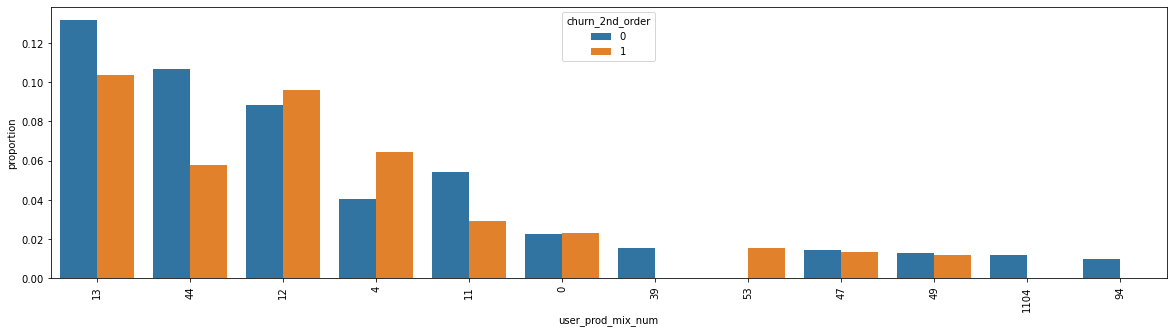

In [91]:
fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data=df_plot_2nd_order_prod_mix.sort_values(by=['proportion'], ascending=False).head(20), x='user_prod_mix_num', y='proportion', hue='churn_2nd_order', ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(90)

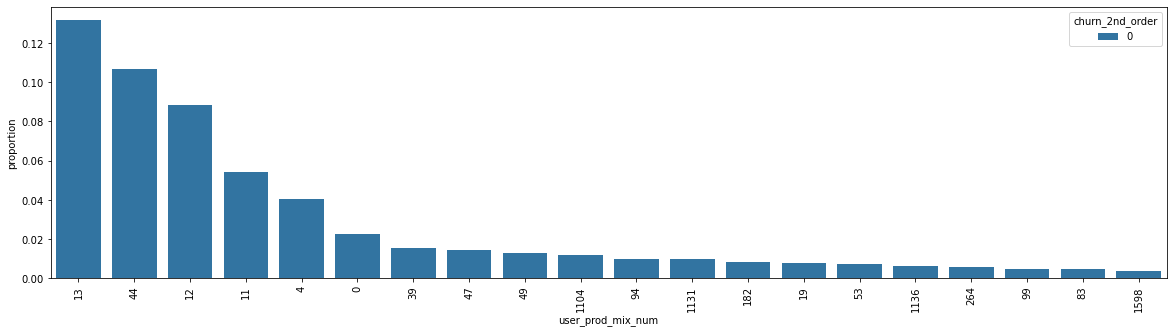

In [92]:
fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data=df_plot_2nd_order_prod_mix.sort_values(by=['churn_2nd_order', 'proportion'], ascending=[True, False]).head(20), x='user_prod_mix_num', y='proportion', hue='churn_2nd_order', ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(90)

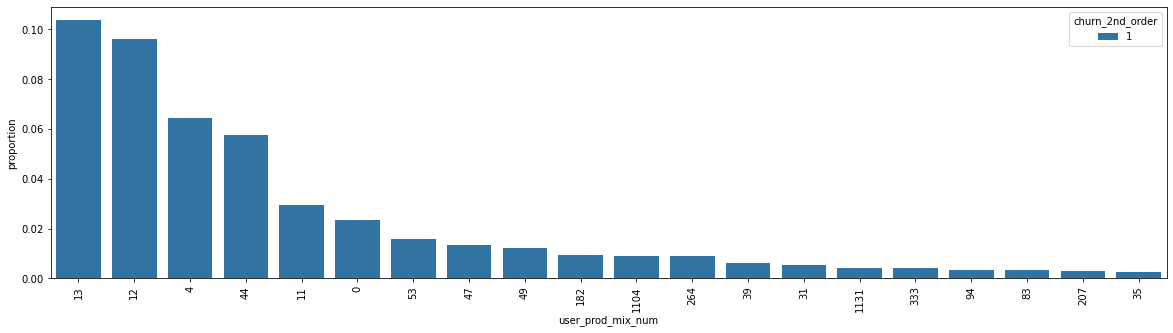

In [93]:
fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data=df_plot_2nd_order_prod_mix.sort_values(by=['churn_2nd_order', 'proportion'], ascending=[False, False]).head(20), x='user_prod_mix_num', y='proportion', hue='churn_2nd_order', ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(90)

# Churn 3rd Order - Product Plots

In [94]:
cols = [col for col in df_user_3rd_order_churn.columns if ('num_' in col) & ('2nd_' in col) & ('items_' not in col) & ('prod_types_' not in col) & ('cups' not in col) & ('pouches' not in col) & ('yoghurts' not in col)]
cols.extend(['user_id'])
cols.extend(['churn_3rd_order'])
#cols.remove('num_prod_types_in_1st_order')

df_plot_3rd_order = df_user_3rd_order_churn[df_user_3rd_order_churn['num_items_in_2nd_order']>0][cols]
df_plot_3rd_order=df_plot_3rd_order.set_index(['user_id', 'churn_3rd_order']).stack().reset_index()
df_plot_3rd_order.columns=['user_id', 'churn_3rd_order', 'product','count']

df_plot_3rd_order_agg = df_plot_3rd_order.groupby(['churn_3rd_order','product'])['count'].sum().reset_index()

df_plot_3rd_order_agg['proportion'] = ''

df_plot_3rd_order_agg.loc[df_plot_3rd_order_agg['churn_3rd_order']==0, 'proportion'] = df_plot_3rd_order_agg[df_plot_3rd_order_agg['churn_3rd_order']==0]['count'] / df_plot_3rd_order_agg[df_plot_3rd_order_agg['churn_3rd_order']==0]['count'].sum()
df_plot_3rd_order_agg.loc[df_plot_3rd_order_agg['churn_3rd_order']==1, 'proportion'] = df_plot_3rd_order_agg[df_plot_3rd_order_agg['churn_3rd_order']==1]['count'] / df_plot_3rd_order_agg[df_plot_3rd_order_agg['churn_3rd_order']==1]['count'].sum()

In [95]:
df_plot_3rd_order_agg[df_plot_3rd_order_agg['count']!=0].head()

,churn_3rd_order,product,count,proportion
0,0,num_1_in_2nd_order,25.0,0.00182402
1,0,num_2201_in_2nd_order,909.0,0.0663213
2,0,num_2202_in_2nd_order,457.0,0.0333431
3,0,num_2203_in_2nd_order,326.0,0.0237852
4,0,num_2220_in_2nd_order,793.0,0.0578579


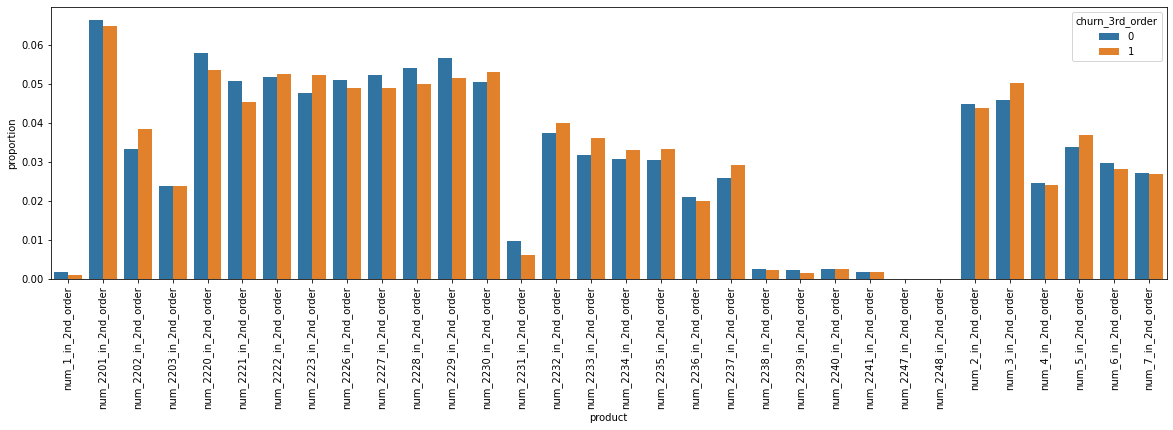

In [96]:
fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data=df_plot_3rd_order_agg, x='product', y='proportion', hue='churn_3rd_order', ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(90)

## Show the most common product combinations in churn and non-churn scenarios 

In [97]:
df_plot_3rd_order['user_prod_mix'] = df_plot_3rd_order[df_plot_3rd_order['count']>0].groupby(['user_id','churn_3rd_order'])['product'].transform(lambda x: ', '.join(x))

df_plot_3rd_order_prod_mix = df_plot_3rd_order.groupby(['user_id', 'churn_3rd_order'])['user_prod_mix'].unique().reset_index()
df_plot_3rd_order_prod_mix['user_prod_mix'] = df_plot_3rd_order_prod_mix['user_prod_mix'].astype(str)

TMP = pd.DataFrame(df_plot_3rd_order_prod_mix['user_prod_mix'].unique())
TMP = TMP.reset_index()
TMP.columns = ['user_prod_mix_num', 'user_prod_mix']
TMP['user_prod_mix_num'] = TMP['user_prod_mix_num'].astype(str)

df_plot_3rd_order_prod_mix = pd.merge(left=df_plot_3rd_order_prod_mix, right=TMP, how='left', on='user_prod_mix')

df_plot_3rd_order_prod_mix = df_plot_3rd_order_prod_mix.groupby(['user_prod_mix', 'user_prod_mix_num', 'churn_3rd_order'])['user_id'].count().reset_index()
df_plot_3rd_order_prod_mix.columns=['user_prod_mix', 'user_prod_mix_num', 'churn_3rd_order', 'user_count']

df_plot_3rd_order_prod_mix['proportion'] = ''
df_plot_3rd_order_prod_mix.loc[df_plot_3rd_order_prod_mix['churn_3rd_order']==0, 'proportion'] = df_plot_3rd_order_prod_mix[df_plot_3rd_order_prod_mix['churn_3rd_order']==0]['user_count'] / df_plot_3rd_order_prod_mix[df_plot_3rd_order_prod_mix['churn_3rd_order']==0]['user_count'].sum()
df_plot_3rd_order_prod_mix.loc[df_plot_3rd_order_prod_mix['churn_3rd_order']==1, 'proportion'] = df_plot_3rd_order_prod_mix[df_plot_3rd_order_prod_mix['churn_3rd_order']==1]['user_count'] / df_plot_3rd_order_prod_mix[df_plot_3rd_order_prod_mix['churn_3rd_order']==1]['user_count'].sum()

#df_plot_3rd_order_prod_mix.sort_values(by=['churn_3rd_order', 'proportion'], ascending=False)

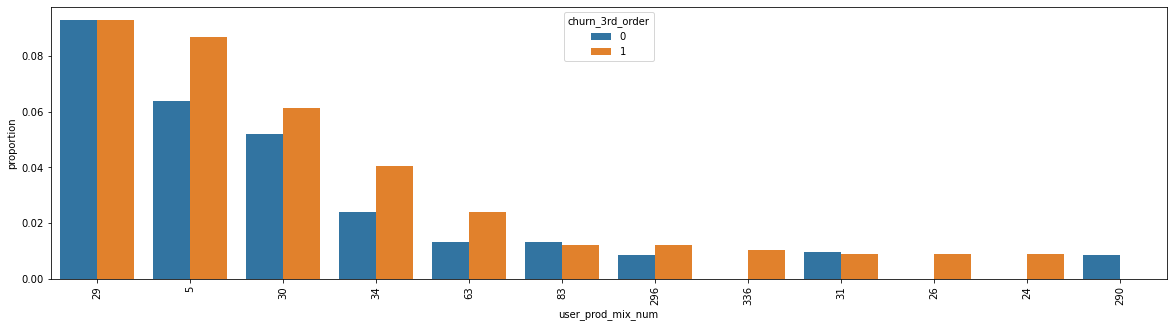

In [98]:
#df_plot_3rd_order_prod_mix.set_index('user_prod_mix').sort_values(by='user_count', ascending=False).head(20).plot.bar(figsize=(15,5))

fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data=df_plot_3rd_order_prod_mix.sort_values(by=['proportion'], ascending=False).head(20), x='user_prod_mix_num', y='proportion', hue='churn_3rd_order', ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(90)

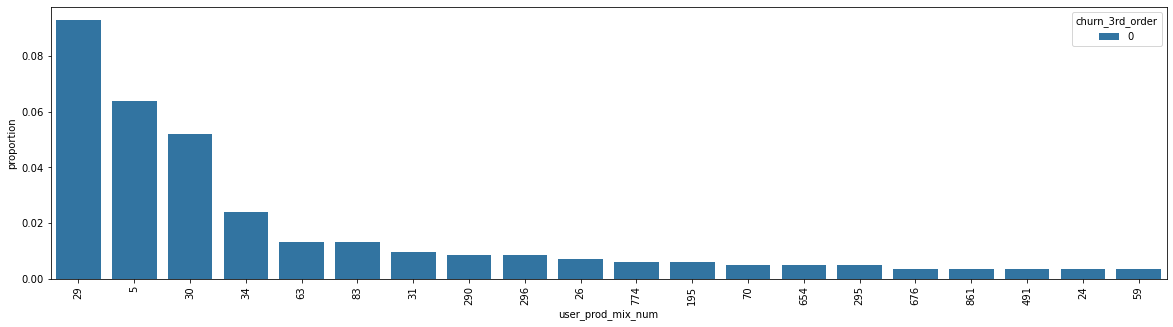

In [99]:
#df_plot_2nd_order_prod_mix.set_index('user_prod_mix').sort_values(by='user_count', ascending=False).head(20).plot.bar(figsize=(15,5))

fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data=df_plot_3rd_order_prod_mix.sort_values(by=['churn_3rd_order', 'proportion'], ascending=[True, False]).head(20), x='user_prod_mix_num', y='proportion', hue='churn_3rd_order', ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(90)

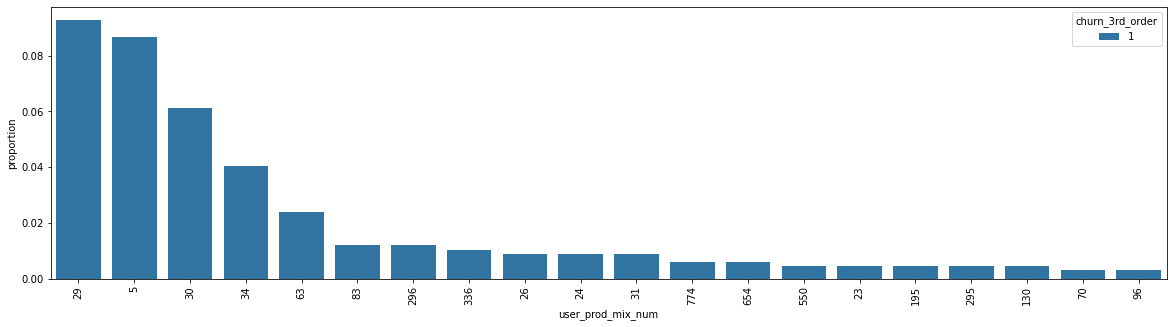

In [100]:
#df_plot_2nd_order_prod_mix.set_index('user_prod_mix').sort_values(by='user_count', ascending=False).head(20).plot.bar(figsize=(15,5))

fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data=df_plot_3rd_order_prod_mix.sort_values(by=['churn_3rd_order', 'proportion'], ascending=[False, False]).head(20), x='user_prod_mix_num', y='proportion', hue='churn_3rd_order', ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(90)